### Analiza korpusu specjalnego

**Metodyka zbierania danych**: Dane zostały zebrane z Twittera za pomocą biblioteki SNScrape Twitter z ograniczeniem językowym i ilościowym. Początkowy zbiór zawierał ponad 5 milionów prykładów. Dane były zbierane do pliku csv w postaci "text, autor". Dane zostały oczyczone od hyperlinków, emotek i hashtagów. Nie zostały uwzględnione w zbiorze również tweety zawierające mniej niż trzy słowa. Ostatecznie w zbiorze zostali autorzy, do których należało co najmniej 30 tweetów. W zbiorze ostatecznym zostało 201 203 tekstów należących do 3872 autorów.

In [5]:
import pandas as pd

tweets = pd.read_csv("../data/full_corpus/tweets_pl.csv")
tweets.shape

(201203, 3)

In [6]:
len(tweets['username'].unique())

3872

<AxesSubplot:>

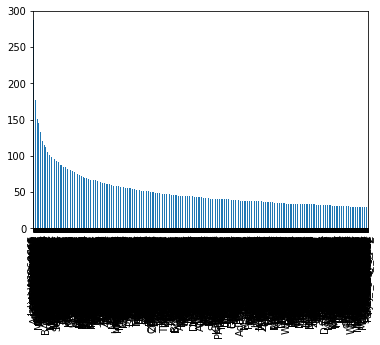

In [7]:
tweets['username'].value_counts().plot.bar(ylim=(0, 300))

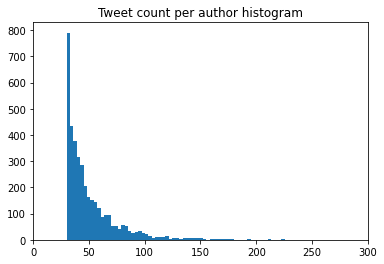

In [8]:
import matplotlib.pyplot as plt

author2tweet_count = tweets.groupby('username')['username'].size().reset_index(name='tweet_count')
tweet_count = author2tweet_count['tweet_count'].to_numpy()
plt.hist(tweet_count, bins='auto')
plt.xlim(0, 300)
plt.title("Tweet count per author histogram")
plt.show()

In [9]:
tweets['word_count'] = tweets['text'].apply(lambda x: len(x.split(' ')))

In [10]:
import numpy as np

word_count = tweets['word_count'].to_numpy()
def plot_count_hist(name_stats: str, stats_arr: np.ndarray) -> None:
    plt.hist(stats_arr, bins='auto')
    plt.title(f"{name_stats} histogram")
    plt.show()

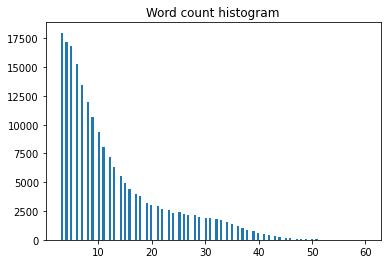

In [11]:
plot_count_hist(name_stats="Word count", stats_arr=word_count)

In [12]:

def print_stats(stats_name: str, stats_arr: np.ndarray):
    print(f"Maximal {stats_name}: {np.max(stats_arr)} \nMinimal {stats_name}: {np.min(stats_arr)} \nAverage {stats_name}: {np.mean(stats_arr)} \nMedian {stats_name}: {np.median(stats_arr)}\nStandard deviation: {np.std(stats_arr)}")

In [13]:
print_stats(stats_name="word count", stats_arr=word_count)

Maximal word count: 60 
Minimal word count: 3 
Average word count: 12.575851254702961 
Median word count: 9.0
Standard deviation: 9.50045995796065


In [14]:
print_stats(stats_name="tweets per author", stats_arr=tweet_count)

Maximal tweets per author: 1292 
Minimal tweets per author: 30 
Average tweets per author: 51.9635847107438 
Median tweets per author: 43.0
Standard deviation: 33.81933444945944


### Analiza korpusu pełnego

Dane do korpusu pełnego to połączenie kilku korpusów zawierających teksty nieoznaczone: Subkorpus milionowy Nacjonalnego korpusu języka polskiego, OSCAR (dump internetowy w języku polskim) oraz Wikipedia. Ilosć pozyskanych danych wynosi 497,3 MB (817 480 prykładów uczących). Każdy z podkorpusów został przeanalizowany oddzielnie, a potem w postaci połączonej. Z korpusów Wiki i OSCAR usunięte zostały teksty o długości przekraczającej 400-500 słów.


In [15]:
"""NKJP"""

nkjp_corpus = pd.read_csv("../data/full_corpus/nkjp.csv")
print(nkjp_corpus.shape)

(3889, 4)


In [16]:
texts = nkjp_corpus.texts.to_numpy().flatten()
len(texts)

3889

In [18]:
nkjp_word_count = nkjp_corpus['word_count'].to_numpy()
print_stats(stats_name="NKJP word count", stats_arr=nkjp_word_count)

Maximal NKJP word count: 144 
Minimal NKJP word count: 11 
Average NKJP word count: 51.80097711493957 
Median NKJP word count: 51.0
Standard deviation: 9.779912298610716


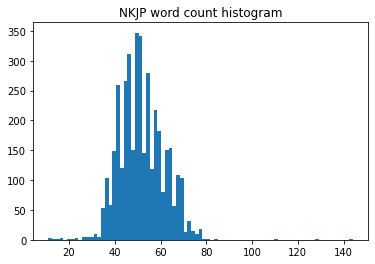

In [19]:
plot_count_hist(name_stats="NKJP word count", stats_arr=nkjp_word_count)

In [20]:
"""OSCAR"""

oscar_df = pd.read_csv("../data/full_corpus/oscar.csv")
oscar_df.shape

(108913, 6)

In [22]:
oscar_word_count = oscar_df.word_count.to_numpy()
print_stats(stats_name="OSCAR word count", stats_arr=oscar_word_count)

Maximal OSCAR word count: 499 
Minimal OSCAR word count: 11 
Average OSCAR word count: 138.84665742381534 
Median OSCAR word count: 96.0
Standard deviation: 123.01121926722234


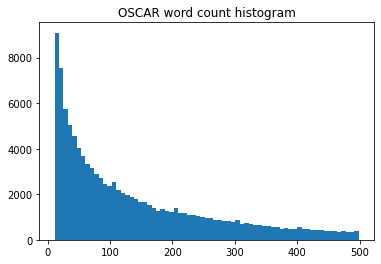

In [23]:
plot_count_hist(name_stats="OSCAR word count", stats_arr=oscar_word_count)

In [24]:
"""Wiki"""

path_to_wiki = "../data/full_corpus/wiki.csv"
wiki_df = pd.read_csv(path_to_wiki)
wiki_df.shape

(704678, 4)

In [26]:
wiki_word_count = wiki_df.word_count.to_numpy()
print_stats(stats_name="Wikipedia word count", stats_arr=wiki_word_count)

Maximal Wikipedia word count: 199 
Minimal Wikipedia word count: 12 
Average Wikipedia word count: 68.88327008931739 
Median Wikipedia word count: 51.0
Standard deviation: 48.0154413482658


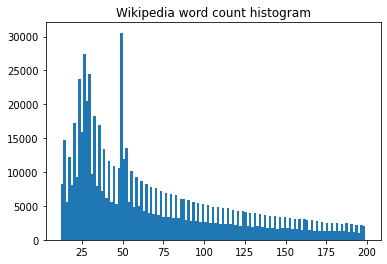

In [27]:
plot_count_hist(name_stats="Wikipedia word count", stats_arr=wiki_word_count)

In [28]:
"""Full corpus analysis"""
tokens = []
word_counts = []

tokens.extend(nkjp_corpus.texts.to_list())
tokens.extend(oscar_df.text.to_list())
tokens.extend(wiki_df.text.to_list())

word_counts.extend(nkjp_corpus.word_count.to_list())
word_counts.extend(oscar_df.word_count.to_list())
word_counts.extend(wiki_df.word_count.to_list())

assert len(tokens) == len(word_counts)

In [29]:
full_corpus_dict = {'text': tokens, 'word count': word_counts}
full_corpus = pd.DataFrame.from_dict(full_corpus_dict)
full_corpus.shape

(817480, 2)

In [31]:
full_corpus.to_csv("../data/full_corpus/full_corpus.csv")

In [33]:
full_word_count = full_corpus['word count'].to_numpy()

print_stats(stats_name="Full corpus word count", stats_arr=full_word_count)

Maximal Full corpus word count: 499 
Minimal Full corpus word count: 11 
Average Full corpus word count: 78.12323848901502 
Median Full corpus word count: 54.0
Standard deviation: 67.61636769441235


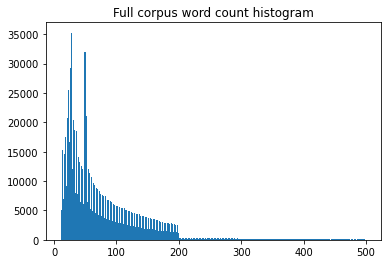

In [34]:
plot_count_hist(name_stats="Full corpus word count", stats_arr=full_word_count)